In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
import os

os.chdir('/content/drive/My Drive/Colab Notebooks/')

In [ ]:
!unzip "/content/drive/MyDrive/Colab Notebooks/test.zip" -d "/content/drive/MyDrive/Colab Notebooks/chest_xray/test"

Archive:  /content/drive/MyDrive/Colab Notebooks/test.zip
   creating: /content/drive/MyDrive/Colab Notebooks/chest_xray/test/NORMAL/
   creating: /content/drive/MyDrive/Colab Notebooks/chest_xray/test/PNEUMONIA/
  inflating: /content/drive/MyDrive/Colab Notebooks/chest_xray/test/PNEUMONIA/person1676_virus_2892.jpeg  
  inflating: /content/drive/MyDrive/Colab Notebooks/chest_xray/test/PNEUMONIA/person1650_virus_2852.jpeg  
  inflating: /content/drive/MyDrive/Colab Notebooks/chest_xray/test/PNEUMONIA/person22_virus_55.jpeg  
  inflating: /content/drive/MyDrive/Colab Notebooks/chest_xray/test/PNEUMONIA/person122_bacteria_582.jpeg  
  inflating: /content/drive/MyDrive/Colab Notebooks/chest_xray/test/PNEUMONIA/person85_bacteria_417.jpeg  
  inflating: /content/drive/MyDrive/Colab Notebooks/chest_xray/test/PNEUMONIA/person79_virus_148.jpeg  
  inflating: /content/drive/MyDrive/Colab Notebooks/chest_xray/test/PNEUMONIA/person29_virus_64.jpeg  
  inflating: /content/drive/MyDrive/Colab Notebo

In [ ]:
!unzip "/content/drive/MyDrive/Colab Notebooks/val.zip" -d "/content/drive/MyDrive/Colab Notebooks/chest_xray/val"

Archive:  /content/drive/MyDrive/Colab Notebooks/val.zip
   creating: /content/drive/MyDrive/Colab Notebooks/chest_xray/val/NORMAL/
   creating: /content/drive/MyDrive/Colab Notebooks/chest_xray/val/PNEUMONIA/
  inflating: /content/drive/MyDrive/Colab Notebooks/chest_xray/val/PNEUMONIA/person1947_bacteria_4876.jpeg  
  inflating: /content/drive/MyDrive/Colab Notebooks/chest_xray/val/PNEUMONIA/person1946_bacteria_4875.jpeg  
  inflating: /content/drive/MyDrive/Colab Notebooks/chest_xray/val/PNEUMONIA/person1952_bacteria_4883.jpeg  
  inflating: /content/drive/MyDrive/Colab Notebooks/chest_xray/val/PNEUMONIA/person1954_bacteria_4886.jpeg  
  inflating: /content/drive/MyDrive/Colab Notebooks/chest_xray/val/PNEUMONIA/person1951_bacteria_4882.jpeg  
  inflating: /content/drive/MyDrive/Colab Notebooks/chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg  
  inflating: /content/drive/MyDrive/Colab Notebooks/chest_xray/val/PNEUMONIA/person1949_bacteria_4880.jpeg  
  inflating: /content/drive

In [ ]:
!unzip "/content/drive/MyDrive/Colab Notebooks/train.zip" -d "/content/drive/MyDrive/Colab Notebooks/chest_xray/train"

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/Colab Notebooks/chest_xray/train/PNEUMONIA/person629_bacteria_2509.jpeg  
  inflating: /content/drive/MyDrive/Colab Notebooks/chest_xray/train/PNEUMONIA/person952_bacteria_2877.jpeg  
  inflating: /content/drive/MyDrive/Colab Notebooks/chest_xray/train/PNEUMONIA/person1315_virus_2270.jpeg  
  inflating: /content/drive/MyDrive/Colab Notebooks/chest_xray/train/PNEUMONIA/person1392_bacteria_3538.jpeg  
  inflating: /content/drive/MyDrive/Colab Notebooks/chest_xray/train/PNEUMONIA/person475_bacteria_2025.jpeg  
  inflating: /content/drive/MyDrive/Colab Notebooks/chest_xray/train/PNEUMONIA/person1288_bacteria_3251.jpeg  
  inflating: /content/drive/MyDrive/Colab Notebooks/chest_xray/train/PNEUMONIA/person1005_virus_1688.jpeg  
  inflating: /content/drive/MyDrive/Colab Notebooks/chest_xray/train/PNEUMONIA/person442_virus_900.jpeg  
  inflating: /content/drive/MyDrive/Colab Notebooks/chest_xray/train/PNEUMO

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
import cv2

**The dataset consists of :**

*   5216 training images of which 3815 are of Pneumonia and 1341 are normal images.
*   624 testing images of which 390 are of Pneumonia and 234 are normal.



**Model outputs :**

0 : Normal condition

1 : Pneumonia condition

In [3]:
from tensorflow.keras.preprocessing import image_dataset_from_directory


train_ds = image_dataset_from_directory(
    directory='/content/drive/MyDrive/Colab Notebooks/chest_xray/train',
    labels='inferred',
    label_mode='binary',
    batch_size=32,
    image_size=(256, 256))

Found 5216 files belonging to 2 classes.


In [4]:
validation_ds = image_dataset_from_directory(
    directory='/content/drive/MyDrive/Colab Notebooks/chest_xray/val',
    labels='inferred',
    label_mode='binary',
    batch_size=32,
    image_size=(256, 256))

Found 16 files belonging to 2 classes.


In [5]:
test_ds = image_dataset_from_directory(
    directory='/content/drive/MyDrive/Colab Notebooks/chest_xray/test',
    labels='inferred',
    label_mode='binary',
    batch_size=32,
    image_size=(256, 256))

Found 624 files belonging to 2 classes.


In [6]:
model= tf.keras.models.Sequential([
    
    tf.keras.Input(shape=(256, 256, 3)),
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(16, (3,3), activation= 'relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation= 'relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation= 'relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation= 'relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation= 'relu'),
    tf.keras.layers.MaxPool2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation= 'relu'),
    tf.keras.layers.Dense(512, activation= 'relu'),
    tf.keras.layers.Dense(1, activation= 'sigmoid')])


model.summary()
model.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        1

In [7]:
history = model.fit(train_ds, epochs = 10, validation_data = test_ds)

Epoch 1/10
163/163 [==============================] - 502s 3s/step - loss: 0.3563 - accuracy: 0.8472 - val_loss: 0.8452 - val_accuracy: 0.7163
Epoch 2/10
163/163 [==============================] - 39s 230ms/step - loss: 0.1271 - accuracy: 0.9536 - val_loss: 0.4010 - val_accuracy: 0.8462
Epoch 3/10
163/163 [==============================] - 37s 219ms/step - loss: 0.0891 - accuracy: 0.9693 - val_loss: 0.4941 - val_accuracy: 0.8381
Epoch 4/10
163/163 [==============================] - 37s 218ms/step - loss: 0.0729 - accuracy: 0.9732 - val_loss: 0.8229 - val_accuracy: 0.7676
Epoch 5/10
163/163 [==============================] - 37s 219ms/step - loss: 0.0584 - accuracy: 0.9778 - val_loss: 0.7257 - val_accuracy: 0.8141
Epoch 6/10
163/163 [==============================] - 39s 229ms/step - loss: 0.0448 - accuracy: 0.9829 - val_loss: 1.0650 - val_accuracy: 0.7708
Epoch 7/10
163/163 [==============================] - 37s 218ms/step - loss: 0.0400 - accuracy: 0.9852 - val_loss: 0.6896 - val_accu

In [16]:
img= cv2.imread('/content/drive/MyDrive/Colab Notebooks/chest_xray/test/NORMAL/IM-0039-0001.jpeg')
tempimg = img
img = cv2.resize(img,(256, 256))
img = img.reshape(1, 256, 256, 3)
model.predict(img)

1/1 [==============================] - 0s 18ms/step


array([[0.27951658]], dtype=float32)

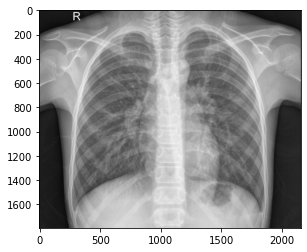

In [17]:
plt.imshow(tempimg)

In [18]:
img= cv2.imread('/content/drive/MyDrive/Colab Notebooks/chest_xray/test/NORMAL/NORMAL2-IM-0130-0001.jpeg')
tempimg = img
img = cv2.resize(img,(256, 256))
img = img.reshape(1, 256, 256, 3)
model.predict(img)

1/1 [==============================] - 0s 24ms/step


array([[2.3838948e-05]], dtype=float32)

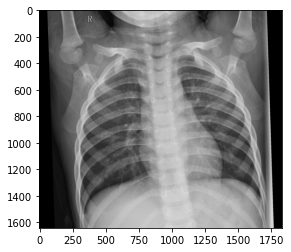

In [19]:
plt.imshow(tempimg)

In [20]:
img= cv2.imread('/content/drive/MyDrive/Colab Notebooks/chest_xray/test/PNEUMONIA/person104_bacteria_492.jpeg')
tempimg = img
img = cv2.resize(img,(256, 256))
img = img.reshape(1, 256, 256, 3)
model.predict(img)

1/1 [==============================] - 0s 17ms/step


array([[1.]], dtype=float32)

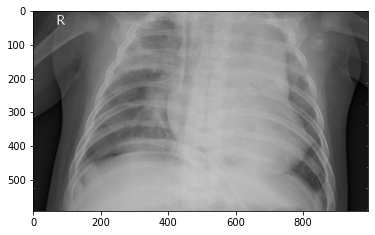

In [21]:
plt.imshow(tempimg)

In [22]:
img= cv2.imread('/content/drive/MyDrive/Colab Notebooks/chest_xray/test/PNEUMONIA/person28_virus_63.jpeg')
tempimg = img
img = cv2.resize(img,(256, 256))
img = img.reshape(1, 256, 256, 3)
model.predict(img)

1/1 [==============================] - 0s 18ms/step


array([[1.]], dtype=float32)

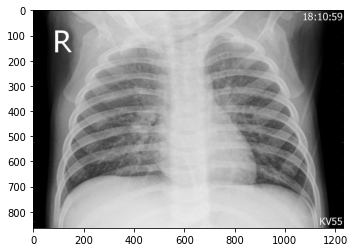

In [23]:
plt.imshow(tempimg)